# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city 
convert_to_uppercase = [city.title() for city in cities]
convert_to_uppercase

['Butaritari',
 'Arraial Do Cabo',
 'Cape Town',
 'Vardo',
 'Esperance',
 'Anandpur Sahib',
 'Hilo',
 'Busselton',
 'Hovd',
 'Bluff',
 'Saint-Philippe',
 'Sambhar',
 'Atuona',
 'Bud',
 'Shihezi',
 'Jamestown',
 'Yumen',
 'Nabire',
 'San Jeronimo',
 'Warrington',
 'Yellowknife',
 'Itaunja',
 'Grand River South East',
 'Magadan',
 'Castro',
 'Mega',
 'Tasiilaq',
 'Chokurdakh',
 'Rawson',
 'Port-Gentil',
 'Broome',
 'Hasaki',
 'Jakar',
 'Kapaa',
 'Albany',
 'Narsaq',
 'Kloulklubed',
 'Bulalacao',
 'Attawapiskat',
 'Mayor Pablo Lagerenza',
 'Bandarbeyla',
 'Ushuaia',
 'Katoro',
 'Acapulco',
 'Meyungs',
 'Lieksa',
 'At-Bashi',
 'Pevek',
 'Eureka',
 'Bodden Town',
 'Valleyview',
 'Westport',
 'Kieta',
 'Laguna',
 'Whitefish',
 'Port Elizabeth',
 'Tshikapa',
 'Kouroussa',
 'Hermanus',
 'Sobolevo',
 'Nishihara',
 'Santa Maria',
 'Araouane',
 'Ribeira Grande',
 'Rikitea',
 'Salalah',
 'Xining',
 'Barrow',
 'Punta Arenas',
 'Illoqqortoormiut',
 'Padang',
 'Gusinoye Ozero',
 'Inhambane',
 'Gerald

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
wind_speed = []
max_temp = []

# Start the call counter 
record = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q="
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    print(city)  
    # Try statement to append calls where value is found 
    try: 
        query_url = url + city + "&appid=" + weather_api_key
        print(query_url)
        response = requests.get(query_url).json() 
        print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        max_temp.append(response["main"]["temp_max"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}{city}")
        
        # Increase counter by one 
        record = record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
    except Exception as e:
        print('Error! Code: {c}, Message, {m}'.format(c = type(e).__name__, m = str(e)))
    continue

Beginning Data Retrieval
-------------------------------
butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=butaritari&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 172.7902, 'lat': 3.0707}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.8, 'feels_like': 85.5, 'temp_min': 80.8, 'temp_max': 80.8, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.82, 'deg': 76}, 'clouds': {'all': 40}, 'dt': 1613158266, 'sys': {'country': 'KI', 'sunrise': 1613155361, 'sunset': 1613198618}, 'timezone': 43200, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
Processing Record 1 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=butaritari
arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=arraial do cabo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -42.0278,

sambhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sambhar&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 75.2, 'lat': 26.9167}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 61.12, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1015, 'humidity': 48}, 'visibility': 2500, 'wind': {'speed': 3.44, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1613158284, 'sys': {'type': 1, 'id': 9170, 'country': 'IN', 'sunrise': 1613180242, 'sunset': 1613220581}, 'timezone': 19800, 'id': 1257539, 'name': 'Sāmbhar', 'cod': 200}
Processing Record 12 | Sāmbhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sambhar
atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=atuona&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -139.0333, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', '

grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=grand river south east&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=magadan&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 150.8, 'lat': 59.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.42, 'feels_like': -2.7, 'temp_min': 6.42, 'temp_max': 6.42, 'pressure': 1026, 'humidity': 84, 'sea_level': 1026, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 5.23, 'deg': 47}, 'clouds': {'all': 100}, 'dt': 1613158299, 'sys': {'country': 'RU', 'sunrise': 1613165982, 'sunset': 1613198552}, 'timezone': 39600, 'id': 2123628, 'name': 'Magadan', 'cod': 200}
Processing Record 23 | Magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=magadan
cas

albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=albany&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.92, 'feels_like': 8.53, 'temp_min': 17.01, 'temp_max': 19, 'pressure': 1024, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 360}, 'clouds': {'all': 98}, 'dt': 1613158207, 'sys': {'type': 3, 'id': 19530, 'country': 'US', 'sunrise': 1613131000, 'sunset': 1613168623}, 'timezone': -18000, 'id': 5106841, 'name': 'Albany', 'cod': 200}
Processing Record 34 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=albany
narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=narsaq&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -46.05, 'lat': 60.9167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], '

pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pevek&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.98, 'feels_like': -29.2, 'temp_min': -18.98, 'temp_max': -18.98, 'pressure': 1035, 'humidity': 89, 'sea_level': 1035, 'grnd_level': 1028}, 'visibility': 1073, 'wind': {'speed': 5.93, 'deg': 157}, 'clouds': {'all': 100}, 'dt': 1613158094, 'sys': {'country': 'RU', 'sunrise': 1613164891, 'sunset': 1613190277}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
Processing Record 45 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pevek
eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=eureka&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -124.1637, 'lat': 40.8021}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast cloud

hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hermanus&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72, 'feels_like': 75.6, 'temp_min': 72, 'temp_max': 72, 'pressure': 1010, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 125}, 'clouds': {'all': 0}, 'dt': 1613158203, 'sys': {'type': 3, 'id': 2006131, 'country': 'ZA', 'sunrise': 1613103294, 'sunset': 1613151593}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
Processing Record 56 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hermanus
sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sobolevo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 31.8996, 'lat': 54.4299}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 's

illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=illoqqortoormiut&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=padang&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 100.3543, 'lat': -0.9492}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 82.26, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 20}, 'rain': {'1h': 3.65}, 'clouds': {'all': 90}, 'dt': 1613158295, 'sys': {'type': 1, 'id': 9423, 'country': 'ID', 'sunrise': 1613172515, 'sunset': 1613216233}, 'timezone': 25200, 'id': 1633419, 'name': 'Padang', 'cod': 200}
Processing Record 67 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=padang
gusinoye ozero
h

kusk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kusk&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=qaanaaq&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -1.75, 'feels_like': -10.3, 'temp_min': -1.75, 'temp_max': -1.75, 'pressure': 1015, 'humidity': 70, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 41}, 'clouds': {'all': 0}, 'dt': 1613158365, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
Processing Record 78 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=qaanaaq
tuatapere
http://api.openweathermap.org/data/2.5/weather?un

margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=margate&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 1.3862, 'lat': 51.3813}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 29.43, 'feels_like': 21.36, 'temp_min': 28.99, 'temp_max': 30, 'pressure': 1014, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 255, 'gust': 8.99}, 'clouds': {'all': 46}, 'dt': 1613158379, 'sys': {'type': 3, 'id': 2020742, 'country': 'GB', 'sunrise': 1613114022, 'sunset': 1613149432}, 'timezone': 0, 'id': 2643044, 'name': 'Margate', 'cod': 200}
Processing Record 89 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=margate
turbat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=turbat&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 63.044, 'lat': 26.0023}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon'

new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=new norfolk&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 52.9, 'temp_min': 52, 'temp_max': 57, 'pressure': 1005, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 265, 'gust': 5.99}, 'clouds': {'all': 47}, 'dt': 1613158392, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1613158216, 'sunset': 1613208114}, 'timezone': 39600, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
Processing Record 100 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=new norfolk
saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint george&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -113.5841, 'lat': 37.1041}, 'weather': [{'id': 802, 'main': 'Clouds

malyye derbety
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=malyye derbety&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 44.6808, 'lat': 47.9547}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.78, 'feels_like': 30.94, 'temp_min': 40.78, 'temp_max': 40.78, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 12.64, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1613158405, 'sys': {'country': 'RU', 'sunrise': 1613103172, 'sunset': 1613139500}, 'timezone': 10800, 'id': 530196, 'name': 'Malye Derbety', 'cod': 200}
Processing Record 111 | Malye Derbety
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=malyye derbety
gigmoto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=gigmoto&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 124.39, 'lat': 13.7796}, 'weather': [{'id': 803, 'main': 

taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=taolanaro&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=egvekinot&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -179.1667, 'lat': 66.3167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -19.7, 'feels_like': -37.79, 'temp_min': -19.7, 'temp_max': -19.7, 'pressure': 1024, 'humidity': 83, 'sea_level': 1024, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 19.84, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1613158419, 'sys': {'country': 'RU', 'sunrise': 1613246967, 'sunset': 1613275949}, 'timezone': 43200, 'id': 4031742, 'name': 'Egvekinot', 'cod': 200}
Processing Record 122 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=egvekinot
vaini
htt

puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=puerto ayora&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.55, 'feels_like': 86.58, 'temp_min': 80.01, 'temp_max': 84.2, 'pressure': 1009, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 30}, 'rain': {'1h': 0.55}, 'clouds': {'all': 20}, 'dt': 1613158432, 'sys': {'type': 1, 'id': 8521, 'country': 'EC', 'sunrise': 1613131896, 'sunset': 1613175591}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
Processing Record 133 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=puerto ayora
camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=camacha&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -16.3333, 'lat': 33.0833}, 'weather': [{'id': 800, 'main': 'Clear',

ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ancud&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.83, 'feels_like': 65.37, 'temp_min': 68, 'temp_max': 69.8, 'pressure': 1015, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1613158445, 'sys': {'type': 1, 'id': 8512, 'country': 'CL', 'sunrise': 1613124899, 'sunset': 1613174653}, 'timezone': -10800, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
Processing Record 144 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ancud
augustow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=augustow&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 22.9798, 'lat': 53.8432}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base

papetoai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=papetoai&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -149.8729, 'lat': -17.4961}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.19, 'feels_like': 81.07, 'temp_min': 80.01, 'temp_max': 82.4, 'pressure': 1012, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 70}, 'rain': {'1h': 0.71}, 'clouds': {'all': 75}, 'dt': 1613158459, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1613145173, 'sunset': 1613190885}, 'timezone': -36000, 'id': 4033910, 'name': 'Papetoai', 'cod': 200}
Processing Record 155 | Papetoai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=papetoai
baracoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=baracoa&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -74.4958, 'lat': 20.3467}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': '

paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=paita&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -81.1144, 'lat': -5.0892}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 91.4, 'feels_like': 89.47, 'temp_min': 91.4, 'temp_max': 91.4, 'pressure': 1009, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 210}, 'clouds': {'all': 40}, 'dt': 1613158266, 'sys': {'type': 1, 'id': 8685, 'country': 'PE', 'sunrise': 1613129426, 'sunset': 1613173628}, 'timezone': -18000, 'id': 3694112, 'name': 'Paita', 'cod': 200}
Processing Record 166 | Paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=paita
umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=umzimvubu&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
eldorado
http://api.openweathermap.org/data/2.5

northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=northam&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -4.2167, 'lat': 51.0333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 32.31, 'feels_like': 25.34, 'temp_min': 30, 'temp_max': 34, 'pressure': 1027, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 174, 'gust': 11.99}, 'clouds': {'all': 49}, 'dt': 1613158485, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB', 'sunrise': 1613115314, 'sunset': 1613150829}, 'timezone': 0, 'id': 2641434, 'name': 'Northam', 'cod': 200}
Processing Record 177 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=northam
ust-kishert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ust-kishert&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 57.2495, 'lat': 57.3654}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast 

{'coord': {'lon': -49.6678, 'lat': 61.994}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.17, 'feels_like': 7.95, 'temp_min': 24.17, 'temp_max': 24.17, 'pressure': 998, 'humidity': 92, 'sea_level': 998, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 20.29, 'deg': 330}, 'clouds': {'all': 100}, 'dt': 1613158498, 'sys': {'country': 'GL', 'sunrise': 1613128375, 'sunset': 1613159585}, 'timezone': -10800, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
Processing Record 187 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=paamiut
fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fortuna&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.47, 'feels_like': 46.15, 'temp_min': 50, 'temp_max':

hurghada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hurghada&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 33.8129, 'lat': 27.2574}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 57.99, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1013, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1613158514, 'sys': {'type': 1, 'id': 2513, 'country': 'EG', 'sunrise': 1613103837, 'sunset': 1613144051}, 'timezone': 7200, 'id': 361291, 'name': 'Hurghada', 'cod': 200}
Processing Record 198 | Hurghada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hurghada
velen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=velen&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 6.9833, 'lat': 51.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 's

karangampel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=karangampel&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 108.4519, 'lat': -6.4622}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.72, 'feels_like': 81.68, 'temp_min': 77.72, 'temp_max': 77.72, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.2, 'deg': 275}, 'clouds': {'all': 100}, 'dt': 1613158527, 'sys': {'country': 'ID', 'sunrise': 1613170254, 'sunset': 1613214608}, 'timezone': 25200, 'id': 1641342, 'name': 'Karangampel', 'cod': 200}
Processing Record 209 | Karangampel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=karangampel
nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nome&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -165.4064, 'lat': 64.5011}, 'weather': [{'id': 601, 'main': 'Snow', 'descri

galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=galle&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 80.217, 'lat': 6.0367}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.76, 'feels_like': 81.09, 'temp_min': 75.76, 'temp_max': 75.76, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 336}, 'clouds': {'all': 82}, 'dt': 1613158540, 'sys': {'country': 'LK', 'sunrise': 1613177746, 'sunset': 1613220667}, 'timezone': 19800, 'id': 1246294, 'name': 'Galle', 'cod': 200}
Processing Record 220 | Galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=galle
iranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=iranshahr&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 60.6848, 'lat': 27.2025}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon'

aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aleksandrov gay&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 48.5704, 'lat': 50.147}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.76, 'feels_like': 23.52, 'temp_min': 33.76, 'temp_max': 33.76, 'pressure': 1013, 'humidity': 92, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 11.74, 'deg': 135}, 'clouds': {'all': 100}, 'dt': 1613158554, 'sys': {'country': 'RU', 'sunrise': 1613102534, 'sunset': 1613138271}, 'timezone': 14400, 'id': 583345, 'name': 'Aleksandrov Gay', 'cod': 200}
Processing Record 231 | Aleksandrov Gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aleksandrov gay
salina cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=salina cruz&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -95.2, 'lat': 16.1667}, 'weather': [{'id': 

ivanjica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ivanjica&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 20.2311, 'lat': 43.5803}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.13, 'feels_like': 8.56, 'temp_min': 12.2, 'temp_max': 21.2, 'pressure': 1029, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1613158568, 'sys': {'type': 1, 'id': 7029, 'country': 'RS', 'sunrise': 1613108518, 'sunset': 1613145890}, 'timezone': 3600, 'id': 789988, 'name': 'Ivanjica', 'cod': 200}
Processing Record 241 | Ivanjica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ivanjica
samalaeulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=samalaeulu&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
tura
http://api.openweathermap.org/data/2.5/

{'coord': {'lon': -156.47, 'lat': 20.8947}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.23, 'feels_like': 72.05, 'temp_min': 70, 'temp_max': 73.4, 'pressure': 1016, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1613158581, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1613149052, 'sunset': 1613190172}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
Processing Record 251 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kahului
leer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=leer&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 7.461, 'lat': 53.2316}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.22, 'feels_like': 9, 'temp_min': 15.01, 'temp_max': 21, 'pressure': 1037, 'humidity': 80}, '

obo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=obo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 26.4869, 'lat': 5.3998}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.1, 'feels_like': 72.95, 'temp_min': 78.1, 'temp_max': 78.1, 'pressure': 1007, 'humidity': 21, 'sea_level': 1007, 'grnd_level': 936}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 44}, 'clouds': {'all': 10}, 'dt': 1613158595, 'sys': {'country': 'CF', 'sunrise': 1613104212, 'sunset': 1613147193}, 'timezone': 3600, 'id': 236950, 'name': 'Obo', 'cod': 200}
Processing Record 262 | Obo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=obo
saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-georges&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -61.7485, 'lat': 12.0564}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '0

dubai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dubai&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 55.3047, 'lat': 25.2582}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.54, 'feels_like': 71.76, 'temp_min': 66, 'temp_max': 69.8, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1613158491, 'sys': {'type': 1, 'id': 7537, 'country': 'AE', 'sunrise': 1613098540, 'sunset': 1613139033}, 'timezone': 14400, 'id': 292223, 'name': 'Dubai', 'cod': 200}
Processing Record 273 | Dubai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dubai
los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=los llanos de aridane&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -17.9182, 'lat': 28.6585}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', '

burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=burica&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=palabuhanratu&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
gibara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=gibara&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -76.1317, 'lat': 21.1097}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 85.48, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1013, 'humidity': 33}, 'visibility': 9000, 'wind': {'speed': 6.91, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1613158621, 'sys': {'type': 1, 'id': 7241, 'country': 'CU', 'sunrise': 1613129792, 'sunset': 1613170870}, 'tim

kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kutum&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 24.6667, 'lat': 14.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 63.41, 'feels_like': 55.45, 'temp_min': 63.41, 'temp_max': 63.41, 'pressure': 1013, 'humidity': 28, 'sea_level': 1013, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 35}, 'clouds': {'all': 27}, 'dt': 1613158634, 'sys': {'country': 'SD', 'sunrise': 1613105173, 'sunset': 1613147106}, 'timezone': 7200, 'id': 371745, 'name': 'Kutum', 'cod': 200}
Processing Record 294 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kutum
mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mahebourg&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10

davila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=davila&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 120.5763, 'lat': 18.4726}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 73.63, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1613158647, 'sys': {'type': 1, 'id': 8159, 'country': 'PH', 'sunrise': 1613168800, 'sunset': 1613210242}, 'timezone': 28800, 'id': 1715335, 'name': 'Davila', 'cod': 200}
Processing Record 305 | Davila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=davila
ko samui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ko samui&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 99.9357, 'lat': 9.5357}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'ba

brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=brae&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -1.353, 'lat': 60.3964}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 19.11, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1037, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1613158660, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1613116387, 'sunset': 1613148381}, 'timezone': 0, 'id': 2654970, 'name': 'Brae', 'cod': 200}
Processing Record 316 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=brae
suoyarvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=suoyarvi&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 32.35, 'lat': 62.0833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations',

vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vaitupu&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
ngorongoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ngorongoro&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 35.4875, 'lat': -3.2397}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.35, 'feels_like': 55.58, 'temp_min': 55.35, 'temp_max': 55.35, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 769}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 7}, 'rain': {'1h': 0.34}, 'clouds': {'all': 100}, 'dt': 1613158674, 'sys': {'country': 'TZ', 'sunrise': 1613101548, 'sunset': 1613145537}, 'timezone': 10800, 'id': 151610, 'name': 'Ngorongoro', 'cod': 200}
Processing Record 327 | Ngorongoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ngorongoro

fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fort nelson&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -122.7002, 'lat': 58.8053}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -9.4, 'feels_like': -16.73, 'temp_min': -9.4, 'temp_max': -9.4, 'pressure': 1033, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 75}, 'clouds': {'all': 1}, 'dt': 1613158686, 'sys': {'type': 1, 'id': 986, 'country': 'CA', 'sunrise': 1613145089, 'sunset': 1613177926}, 'timezone': -25200, 'id': 5955902, 'name': 'Fort Nelson', 'cod': 200}
Processing Record 337 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fort nelson
mundo nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mundo nuevo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -95.5, 'lat': 18.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast 

kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kaitangata&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 169.8464, 'lat': -46.2817}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 52.02, 'temp_min': 53.01, 'temp_max': 53.01, 'pressure': 1013, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 293, 'gust': 4}, 'clouds': {'all': 80}, 'dt': 1613158700, 'sys': {'type': 3, 'id': 2000217, 'country': 'NZ', 'sunrise': 1613152314, 'sunset': 1613203078}, 'timezone': 46800, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
Processing Record 348 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kaitangata
severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=severnoye&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 78.3619, 'lat': 56.3491}, 'weather': [{'id': 800, 'main': 'Clear', 'descri

wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=wewak&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 143.6268, 'lat': -3.5534}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.92, 'feels_like': 83.55, 'temp_min': 77.92, 'temp_max': 77.92, 'pressure': 1008, 'humidity': 88, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.43, 'deg': 214}, 'rain': {'1h': 1.776}, 'clouds': {'all': 100}, 'dt': 1613158714, 'sys': {'country': 'PG', 'sunrise': 1613161980, 'sunset': 1613205998}, 'timezone': 36000, 'id': 2083537, 'name': 'Wewak', 'cod': 200}
Processing Record 359 | Wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=wewak
uong bi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=uong bi&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 106.7833, 'lat': 21.0333}, 'weather': [{'id': 800, 'main': 'Clear', 'description

popondetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=popondetta&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 148.2534, 'lat': -8.7537}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.56, 'feels_like': 80.85, 'temp_min': 73.56, 'temp_max': 73.56, 'pressure': 1009, 'humidity': 93, 'sea_level': 1009, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.9, 'deg': 224}, 'rain': {'1h': 0.486}, 'clouds': {'all': 92}, 'dt': 1613158727, 'sys': {'country': 'PG', 'sunrise': 1613160565, 'sunset': 1613205191}, 'timezone': 36000, 'id': 2088163, 'name': 'Popondetta', 'cod': 200}
Processing Record 370 | Popondetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=popondetta
sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sola&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 167.55, 'lat': -13.8833}, 'weather': [{'id': 804, 'main': 'Clouds'

pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pemangkat&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 108.9667, 'lat': 1.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.78, 'feels_like': 80.46, 'temp_min': 76.78, 'temp_max': 76.78, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 10.45, 'deg': 26}, 'clouds': {'all': 100}, 'dt': 1613158742, 'sys': {'country': 'ID', 'sunrise': 1613170569, 'sunset': 1613214045}, 'timezone': 25200, 'id': 1631637, 'name': 'Pemangkat', 'cod': 200}
Processing Record 381 | Pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pemangkat
boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=boa vista&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -60.6733, 'lat': 2.8197}, 'weather': [{'id': 804, 'main': 'Clouds', 'descrip

almoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=almoradi&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -0.792, 'lat': 38.1088}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.83, 'feels_like': 55.74, 'temp_min': 64, 'temp_max': 66.2, 'pressure': 1019, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 290, 'gust': 25.32}, 'clouds': {'all': 0}, 'dt': 1613158755, 'sys': {'type': 1, 'id': 6391, 'country': 'ES', 'sunrise': 1613113014, 'sunset': 1613151485}, 'timezone': 3600, 'id': 2521855, 'name': 'Almoradí', 'cod': 200}
Processing Record 392 | Almoradí
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=almoradi
teahupoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=teahupoo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -149.2667, 'lat': -17.8333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', '

trapani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=trapani&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 12.6667, 'lat': 37.8333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 51.19, 'feels_like': 47.07, 'temp_min': 50, 'temp_max': 53.6, 'pressure': 1018, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1613158769, 'sys': {'type': 1, 'id': 6714, 'country': 'IT', 'sunrise': 1613109761, 'sunset': 1613148278}, 'timezone': 3600, 'id': 2522875, 'name': 'Province of Trapani', 'cod': 200}
Processing Record 403 | Province of Trapani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=trapani
bay roberts
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bay roberts&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -53.2648, 'lat': 47.5999}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 's

dongkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dongkan&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 119.8308, 'lat': 33.9997}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.94, 'feels_like': 37.71, 'temp_min': 42.94, 'temp_max': 42.94, 'pressure': 1024, 'humidity': 87, 'sea_level': 1024, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 117}, 'clouds': {'all': 0}, 'dt': 1613158784, 'sys': {'country': 'CN', 'sunrise': 1613170069, 'sunset': 1613209331}, 'timezone': 28800, 'id': 1812427, 'name': 'Dongkan', 'cod': 200}
Processing Record 414 | Dongkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dongkan
sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sept-iles&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -66.3821, 'lat': 50.2001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast 

yurino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yurino&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 46.3039, 'lat': 56.2942}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': 5.07, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 1011, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 50}, 'snow': {'1h': 0.2}, 'clouds': {'all': 75}, 'dt': 1613158797, 'sys': {'type': 1, 'id': 9042, 'country': 'RU', 'sunrise': 1613104082, 'sunset': 1613137811}, 'timezone': 10800, 'id': 466423, 'name': 'Yurino', 'cod': 200}
Processing Record 425 | Yurino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yurino
tongchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tongchuan&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 109.0897, 'lat': 35.0806}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'ico

mingguang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mingguang&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 117.9638, 'lat': 32.7802}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.67, 'feels_like': 41.85, 'temp_min': 46.67, 'temp_max': 46.67, 'pressure': 1022, 'humidity': 94, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 6.51, 'deg': 107}, 'clouds': {'all': 2}, 'dt': 1613158813, 'sys': {'country': 'CN', 'sunrise': 1613170419, 'sunset': 1613209877}, 'timezone': 28800, 'id': 1800519, 'name': 'Mingguang', 'cod': 200}
Processing Record 436 | Mingguang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mingguang
east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=east london&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 802, 'main': 'Clouds', 'descriptio

lhokseumawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lhokseumawe&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 97.1507, 'lat': 5.1801}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.56, 'feels_like': 84.36, 'temp_min': 77.56, 'temp_max': 77.56, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 180}, 'clouds': {'all': 1}, 'dt': 1613158826, 'sys': {'country': 'ID', 'sunrise': 1613173634, 'sunset': 1613216652}, 'timezone': 25200, 'id': 1214658, 'name': 'Lhokseumawe', 'cod': 200}
Processing Record 447 | Lhokseumawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lhokseumawe
west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=west bay&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -81.4167, 'lat': 19.3667}, 'weather': [{'id': 801, 'main': 'Clouds', 'descript

hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hihifo&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hofn&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 25.65, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 1024, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1613158839, 'sys': {'type': 1, 'id': 76, 'country': 'IS', 'sunrise': 1613120800, 'sunset': 1613150618}, 'timezone': 0, 'id': 2630299, 'name': 'Hofn', 'cod': 200}
Processing Record 458 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hofn
zhaoyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperi

aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aksarka&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 67.7975, 'lat': 66.5606}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -21.21, 'feels_like': -31.11, 'temp_min': -21.21, 'temp_max': -21.21, 'pressure': 1029, 'humidity': 86, 'sea_level': 1029, 'grnd_level': 1026}, 'visibility': 6943, 'wind': {'speed': 5.28, 'deg': 205}, 'clouds': {'all': 100}, 'dt': 1613158852, 'sys': {'country': 'RU', 'sunrise': 1613187945, 'sunset': 1613216430}, 'timezone': 18000, 'id': 1512019, 'name': 'Aksarka', 'cod': 200}
Processing Record 468 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aksarka
digoin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=digoin&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 3.9795, 'lat': 46.4812}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overca

zvenigovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=zvenigovo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 48.0181, 'lat': 55.9742}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': 5.07, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 1011, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 50}, 'snow': {'1h': 0.18}, 'clouds': {'all': 75}, 'dt': 1613158866, 'sys': {'type': 1, 'id': 9042, 'country': 'RU', 'sunrise': 1613103610, 'sunset': 1613137460}, 'timezone': 10800, 'id': 461916, 'name': 'Zvenigovo', 'cod': 200}
Processing Record 479 | Zvenigovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=zvenigovo
tokur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tokur&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 132.9, 'lat': 53.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast c

labutta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=labutta&appid=a4cf2048e2708d5a870780f6a58564bb
{'cod': '404', 'message': 'city not found'}
Error! Code: KeyError, Message, 'name'
dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dwarka&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 68.9678, 'lat': 22.2394}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.51, 'feels_like': 69.46, 'temp_min': 69.51, 'temp_max': 69.51, 'pressure': 1013, 'humidity': 72, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.95, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1613158879, 'sys': {'country': 'IN', 'sunrise': 1613181421, 'sunset': 1613222392}, 'timezone': 19800, 'id': 1272140, 'name': 'Dwārka', 'cod': 200}
Processing Record 490 | Dwārka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dwarka
garowe
http://api.openweathermap.org/da

villacarrillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=villacarrillo&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -3.0848, 'lat': 38.1156}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 45.28, 'feels_like': 42.49, 'temp_min': 45.28, 'temp_max': 45.28, 'pressure': 1024, 'humidity': 86, 'sea_level': 1024, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 327}, 'clouds': {'all': 20}, 'dt': 1613158892, 'sys': {'country': 'ES', 'sunrise': 1613113565, 'sunset': 1613152035}, 'timezone': 3600, 'id': 2509606, 'name': 'Villacarrillo', 'cod': 200}
Processing Record 501 | Villacarrillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=villacarrillo
igunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=igunga&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 33.8833, 'lat': -4.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'de

mapiripan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mapiripan&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -72.1256, 'lat': 2.8892}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 93.33, 'feels_like': 92.66, 'temp_min': 93.33, 'temp_max': 93.33, 'pressure': 1004, 'humidity': 36, 'sea_level': 1004, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 43}, 'clouds': {'all': 59}, 'dt': 1613158906, 'sys': {'country': 'CO', 'sunrise': 1613127732, 'sunset': 1613171007}, 'timezone': -18000, 'id': 3792394, 'name': 'Mapiripán', 'cod': 200}
Processing Record 512 | Mapiripán
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mapiripan
kakhovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kakhovka&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 33.487, 'lat': 46.8137}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 

ormara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ormara&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 64.6357, 'lat': 25.2088}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70, 'feels_like': 68.2, 'temp_min': 70, 'temp_max': 70, 'pressure': 1014, 'humidity': 64, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.27, 'deg': 306}, 'clouds': {'all': 0}, 'dt': 1613158919, 'sys': {'country': 'PK', 'sunrise': 1613182658, 'sunset': 1613223235}, 'timezone': 18000, 'id': 1168700, 'name': 'Ormara', 'cod': 200}
Processing Record 523 | Ormara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ormara
santa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=santa&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 120.4348, 'lat': 17.486}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base'

binika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=binika&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 83.8, 'lat': 21.0333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 63.34, 'feels_like': 59.85, 'temp_min': 63.34, 'temp_max': 63.34, 'pressure': 1013, 'humidity': 39, 'sea_level': 1013, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 92}, 'clouds': {'all': 12}, 'dt': 1613158933, 'sys': {'country': 'IN', 'sunrise': 1613177785, 'sunset': 1613218909}, 'timezone': 19800, 'id': 1275558, 'name': 'Binka', 'cod': 200}
Processing Record 534 | Binka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=binika
alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=alofi&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -169.9187, 'lat': -19.0595}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}

aiquile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aiquile&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -65.1807, 'lat': -18.2041}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.43, 'feels_like': 63.23, 'temp_min': 68.43, 'temp_max': 68.43, 'pressure': 1008, 'humidity': 60, 'sea_level': 1008, 'grnd_level': 781}, 'visibility': 10000, 'wind': {'speed': 11.43, 'deg': 76}, 'clouds': {'all': 88}, 'dt': 1613158947, 'sys': {'country': 'BO', 'sunrise': 1613124794, 'sunset': 1613170611}, 'timezone': -14400, 'id': 3924341, 'name': 'Aiquile', 'cod': 200}
Processing Record 545 | Aiquile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aiquile
fuling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fuling&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 107.3919, 'lat': 29.7022}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear s

tibagi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tibagi&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -50.4136, 'lat': -24.5094}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.19, 'feels_like': 71.42, 'temp_min': 67.19, 'temp_max': 67.19, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 0.98, 'deg': 183}, 'clouds': {'all': 100}, 'dt': 1613158960, 'sys': {'country': 'BR', 'sunrise': 1613120815, 'sunset': 1613167502}, 'timezone': -10800, 'id': 3446550, 'name': 'Tibagi', 'cod': 200}
Processing Record 556 | Tibagi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tibagi
lebyazhye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lebyazhye&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 66.4947, 'lat': 55.2689}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broke

baghmara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=baghmara&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': 86.2085, 'lat': 23.795}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 65.39, 'feels_like': 62.73, 'temp_min': 65.39, 'temp_max': 65.39, 'pressure': 1014, 'humidity': 47, 'sea_level': 1014, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 339}, 'clouds': {'all': 12}, 'dt': 1613158974, 'sys': {'country': 'IN', 'sunrise': 1613177388, 'sunset': 1613218150}, 'timezone': 19800, 'id': 1274553, 'name': 'Baghmara', 'cod': 200}
Processing Record 567 | Baghmara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=baghmara
la reforma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=la reforma&appid=a4cf2048e2708d5a870780f6a58564bb
{'coord': {'lon': -108.05, 'lat': 25.0833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weatherdict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Wind Speed":wind_speed,
    "Max Temp": max_temp
}

weather_data = pd.DataFrame(weatherdict)
weather_data

#Save df to csv
weather_data.to_csv('../Output/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print(f"The graph compares city latitiude to it's max temperature. Cities in the Norhtern hemoisphere tend to have warmer weather.")

## Latitude vs. Humidity Plot

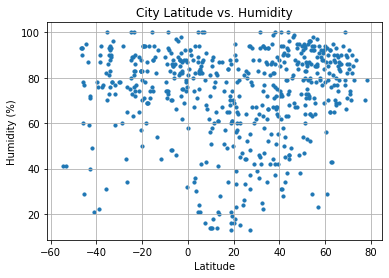

The graph compares city latitiude and humidity. There does not seem to be a correlation between latitude and humidity.


In [10]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()
print(f"The graph compares city latitiude and humidity. There does not seem to be a correlation between latitude and humidity.")

## Latitude vs. Cloudiness Plot

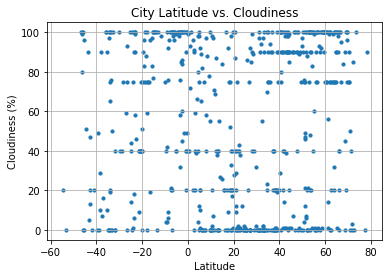

This graph compares city latitudes and cloudiness. There seems to be no correlation.


In [11]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()
print(f"This graph compares city latitudes and cloudiness. There seems to be no correlation.")

## Latitude vs. Wind Speed Plot

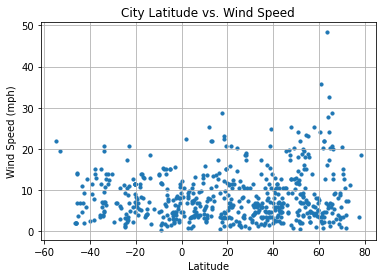

This graph compares city latitude to wind speed. There does not seem to be a correlation between the two.


In [13]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
print(f"This graph compares city latitude to wind speed. There does not seem to be a correlation between the two.")

## Linear Regression

In [17]:
north_hem = weather_data.loc[weather_data["Lat"] >= 0]
south_hem = weather_data.loc[weather_data["Lat"] < 0]
def linear_regression(x,y):
    print(f"The r-squared is : {round(linregress(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -1.43


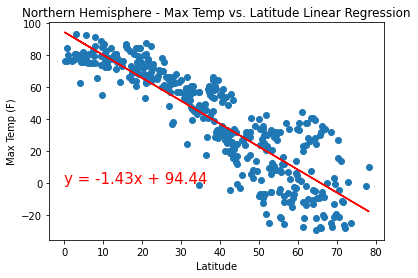

This graph compares max temperatures and city latitude for cities in the Northern Hemisphere. There seems to be a strong negative correlation between temperature and latitiude.


In [19]:
equation = linear_regression(north_hem["Lat"], north_hem["Max Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Plots/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()
print(f"This graph compares max temperatures and city latitude for cities in the Northern Hemisphere. There seems to be a strong negative correlation between temperature and latitiude.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.38


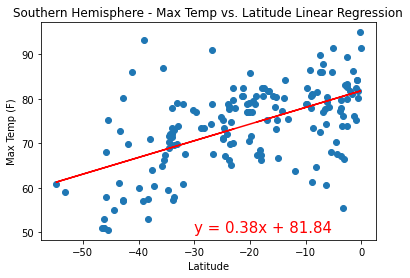

This graph compares max temperature to city latitiude for cities in the Southern Hemisphere. The graph shws a weak positive correlation between the two.


In [20]:
equation = linear_regression(south_hem["Lat"],south_hem["Max Temp"])
annotate(equation, -30, 50)


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Plots/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()
print(f"This graph compares max temperature to city latitiude for cities in the Southern Hemisphere. The graph shws a weak positive correlation between the two.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.32


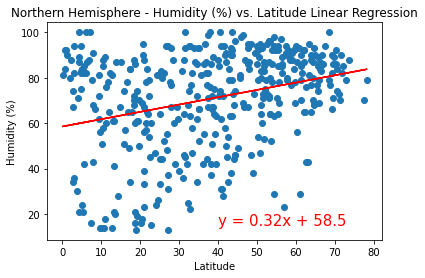

The graph compares humidity and city latitude for cities in the Northern Hemisphere. There is evidence of a weak positive cprrelation between the two factors.


In [21]:
equation = linear_regression(north_hem["Lat"], north_hem["Humidity"])
annotate(equation, 40, 15)


plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Plots/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()
print(f"The graph compares humidity and city latitude for cities in the Northern Hemisphere. There is evidence of a weak positive cprrelation between the two factors.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.18


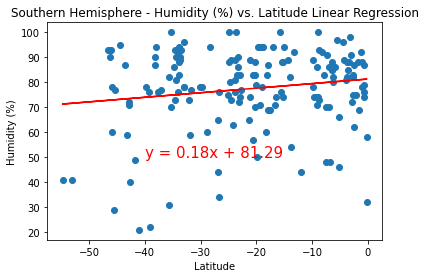

The graph compares humidity and city latitude for cities in the Southern Hemisphere. There seems to be a weak positive correlation between the two.


In [22]:
equation = linear_regression(south_hem["Lat"], south_hem["Humidity"])
annotate(equation, -40, 50)


plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Plots/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()
print(f"The graph compares humidity and city latitude for cities in the Southern Hemisphere. There seems to be a weak positive correlation between the two.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.5


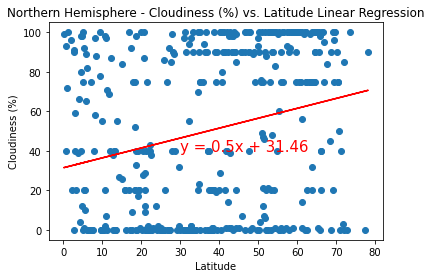

The graph compares cloudiness and city latitude for cities in the Nothern Hemisphere. There is a weak positive correlation between cloudiness and latitiude.


In [23]:
equation = linear_regression(north_hem["Lat"], north_hem["Cloudiness"])
annotate(equation, 30, 40)


plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Plots/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()
print(f"The graph compares cloudiness and city latitude for cities in the Nothern Hemisphere. There is a weak positive correlation between cloudiness and latitiude.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.76


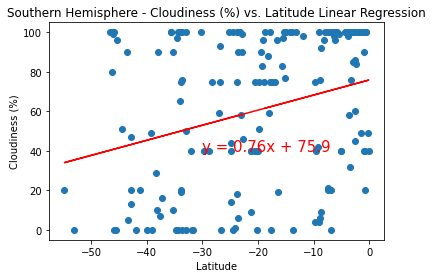

This graph compares cloudiness and city latitude for cities in the Southern Hemisphere. There is a stronger correlation than in the graph for the Northern Hemisphere, but the graph still shows a weak positive correlation.


In [24]:
equation = linear_regression(south_hem["Lat"], south_hem["Cloudiness"])
annotate(equation, -30, 40)


plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Plots/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()
print(f"This graph compares cloudiness and city latitude for cities in the Southern Hemisphere. There is a stronger correlation than in the graph for the Northern Hemisphere, but the graph still shows a weak positive correlation.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


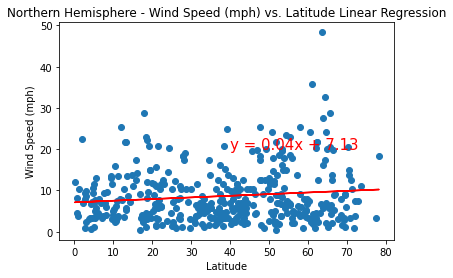

The graph comapres wind speed and city latitiude for cities in the Northern Hemisphere. There is a weak positive correlation between the two.


In [25]:
equation = linear_regression(north_hem["Lat"], north_hem["Wind Speed"])
annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Plots/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()
print(f"The graph comapres wind speed and city latitiude for cities in the Northern Hemisphere. There is a weak positive correlation between the two.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.05


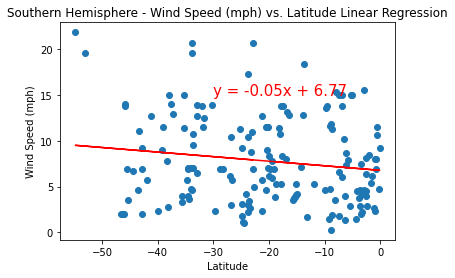

This graph compares wind speed and city latitude for cities in the Southern Hemisphere. There is a weak negative correaltion between the two.


In [26]:
equation = linear_regression(south_hem["Lat"], south_hem["Wind Speed"])
annotate(equation, -30, 15)


plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Plots/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()
print(f"This graph compares wind speed and city latitude for cities in the Southern Hemisphere. There is a weak negative correaltion between the two.")